In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE22.csv',header= 1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df.count()

day            246
month          245
year           245
Temperature    245
 RH            245
 Ws            245
Rain           245
FFMC           245
DMC            245
DC             245
ISI            245
BUI            245
FWI            245
Classes        244
dtype: int64

In [7]:
df.drop([122,123],inplace=True)

In [8]:
df.count()

day            244
month          244
year           244
Temperature    244
 RH            244
 Ws            244
Rain           244
FFMC           244
DMC            244
DC             244
ISI            244
BUI            244
FWI            244
Classes        243
dtype: int64

In [9]:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [10]:
df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [11]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)




In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(6), int32(5), object(3)
memory usage: 23.8+ KB


In [14]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [15]:
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})

In [16]:
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])

In [17]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [18]:
df['date']=pd.to_datetime(df[['day','month','year']])

In [19]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,2012-06-01
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,2012-06-02
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,2012-06-03
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,2012-06-04
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,2012-09-26
242,27,9,2012,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0.0,2012-09-27
243,28,9,2012,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,2012-09-28
244,29,9,2012,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,2012-09-29


In [20]:
df[['DC','FWI']]

,DC,FWI
0,7.6,0.5
1,7.6,0.4
2,7.1,0.1
3,6.9,0
4,14.2,0.5
...,...,...
241,44.5,6.5
242,8,0
243,7.9,0.2
244,15.2,0.7


In [21]:
df['FWI'].mode()

0    0.4
dtype: object

In [22]:
df['FWI']=df['FWI'].replace('fire   ',0.4,inplace=True)

In [23]:
df['FWI']=df['FWI'].astype(float)

In [24]:
df['FWI'].dtype

dtype('float64')

In [25]:
df['DC']=df['DC'].replace('14.6 9',14.69,inplace=True)

In [26]:
df['DC']=df['DC'].astype(float)

In [27]:
df['DC'].dtype

dtype('float64')

In [28]:
df['Classes'].dtype

dtype('float64')

# Creating dataframe

In [29]:
df1=df[['Temperature','RH','Ws','Rain','month','day','FFMC','DMC','ISI','BUI','Classes']]

In [30]:
dataset=pd.DataFrame(df1)

# let's see how data is distributed for every column

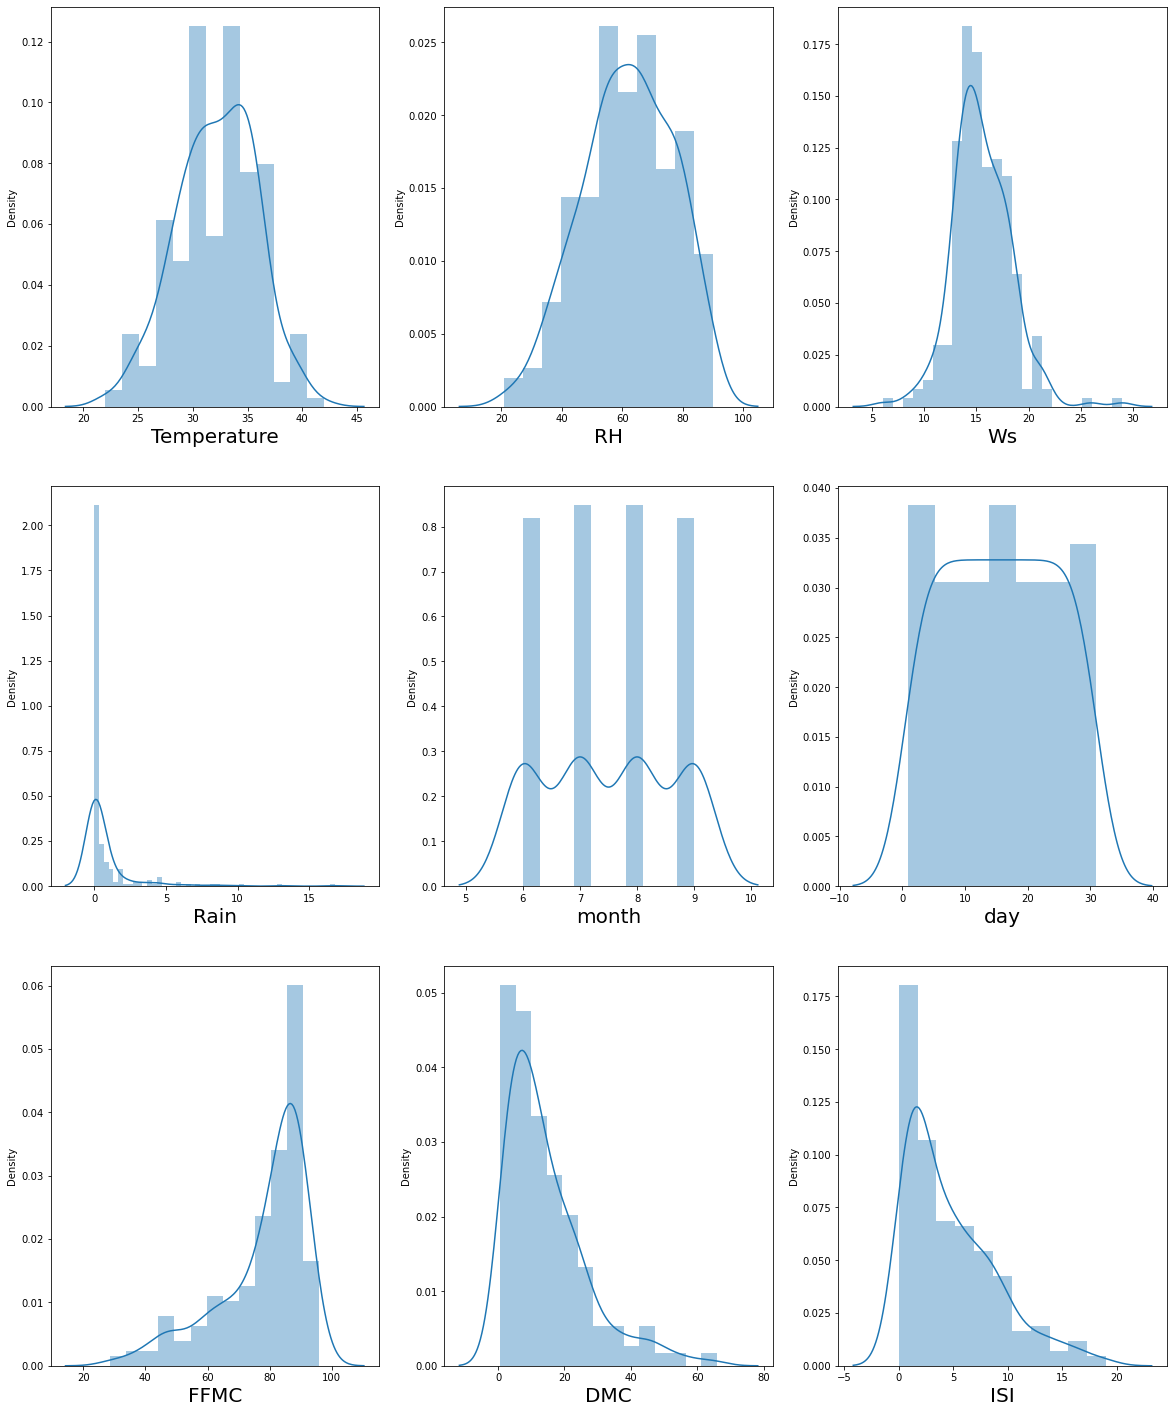

In [31]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

Temperature,RH,Ws Normal distribution

Rain, DMC , ISI right skewed

FFMC left skewed

# Checking outliers

<AxesSubplot:>

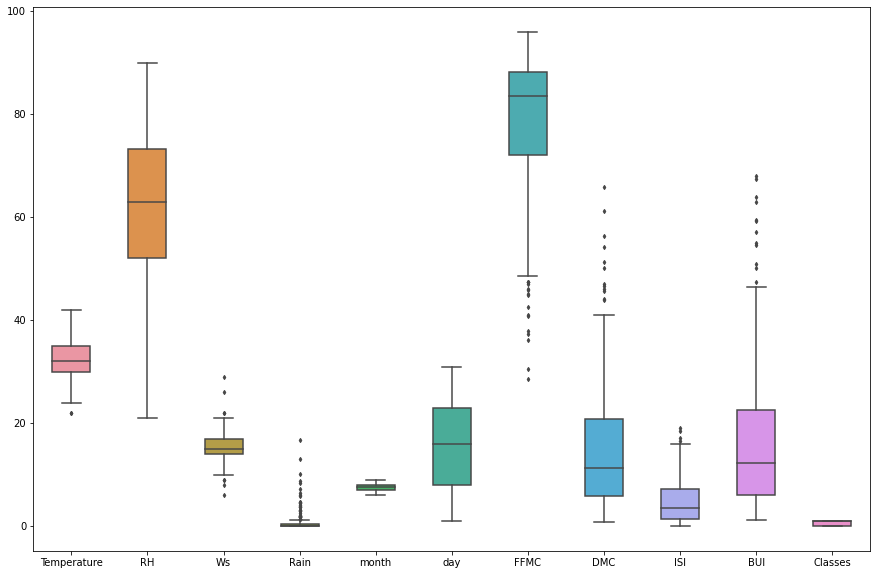

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dataset, width= 0.5,ax=ax,  fliersize=3)


Rain,FFMC,DMC,BUI having more outliers values and Temperature ,Ws ,ISI having less outliers

RH,month,day,Classes don't have outlier values

# Checking Correlation

In [33]:
pd.options.display.float_format= '{:,.4f}'.format
corr_matrix=dataset.corr()
corr_matrix

,Temperature,RH,Ws,Rain,month,day,FFMC,DMC,ISI,BUI,Classes
Temperature,1.0000,-0.6544,-0.2781,-0.3268,-0.0590,0.0958,0.6775,0.4831,0.6076,0.4555,0.5181
RH,-0.6544,1.0000,0.2361,0.2230,-0.0379,-0.0742,-0.6457,-0.4051,-0.6906,-0.3486,-0.4350
Ws,-0.2781,0.2361,1.0000,0.1702,-0.0414,0.0470,-0.1633,-0.0012,0.0152,0.0298,-0.0665
Rain,-0.3268,0.2230,0.1702,1.0000,0.0353,-0.1123,-0.5440,-0.2885,-0.3471,-0.2992,-0.3794
month,-0.0590,-0.0379,-0.0414,0.0353,1.0000,0.0000,0.0156,0.0682,0.0617,0.0858,0.0223
day,0.0958,-0.0742,0.0470,-0.1123,0.0000,1.0000,0.2240,0.4916,0.1777,0.5172,0.2018
FFMC,0.6775,-0.6457,-0.1633,-0.5440,0.0156,0.2240,1.0000,0.6024,0.7397,0.5897,0.7701
DMC,0.4831,-0.4051,-0.0012,-0.2885,0.0682,0.4916,0.6024,1.0000,0.6745,0.9821,0.5842
ISI,0.6076,-0.6906,0.0152,-0.3471,0.0617,0.1777,0.7397,0.6745,1.0000,0.6359,0.7355
BUI,0.4555,-0.3486,0.0298,-0.2992,0.0858,0.5172,0.5897,0.9821,0.6359,1.0000,0.5839


In [34]:
dataset.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'month', 'day', 'FFMC', 'DMC', 'ISI',
       'BUI', 'Classes'],
      dtype='object')

In [35]:
corr_matrix['Classes']

Temperature    0.5181
RH            -0.4350
Ws            -0.0665
Rain          -0.3794
month          0.0223
day            0.2018
FFMC           0.7701
DMC            0.5842
ISI            0.7355
BUI            0.5839
Classes        1.0000
Name: Classes, dtype: float64

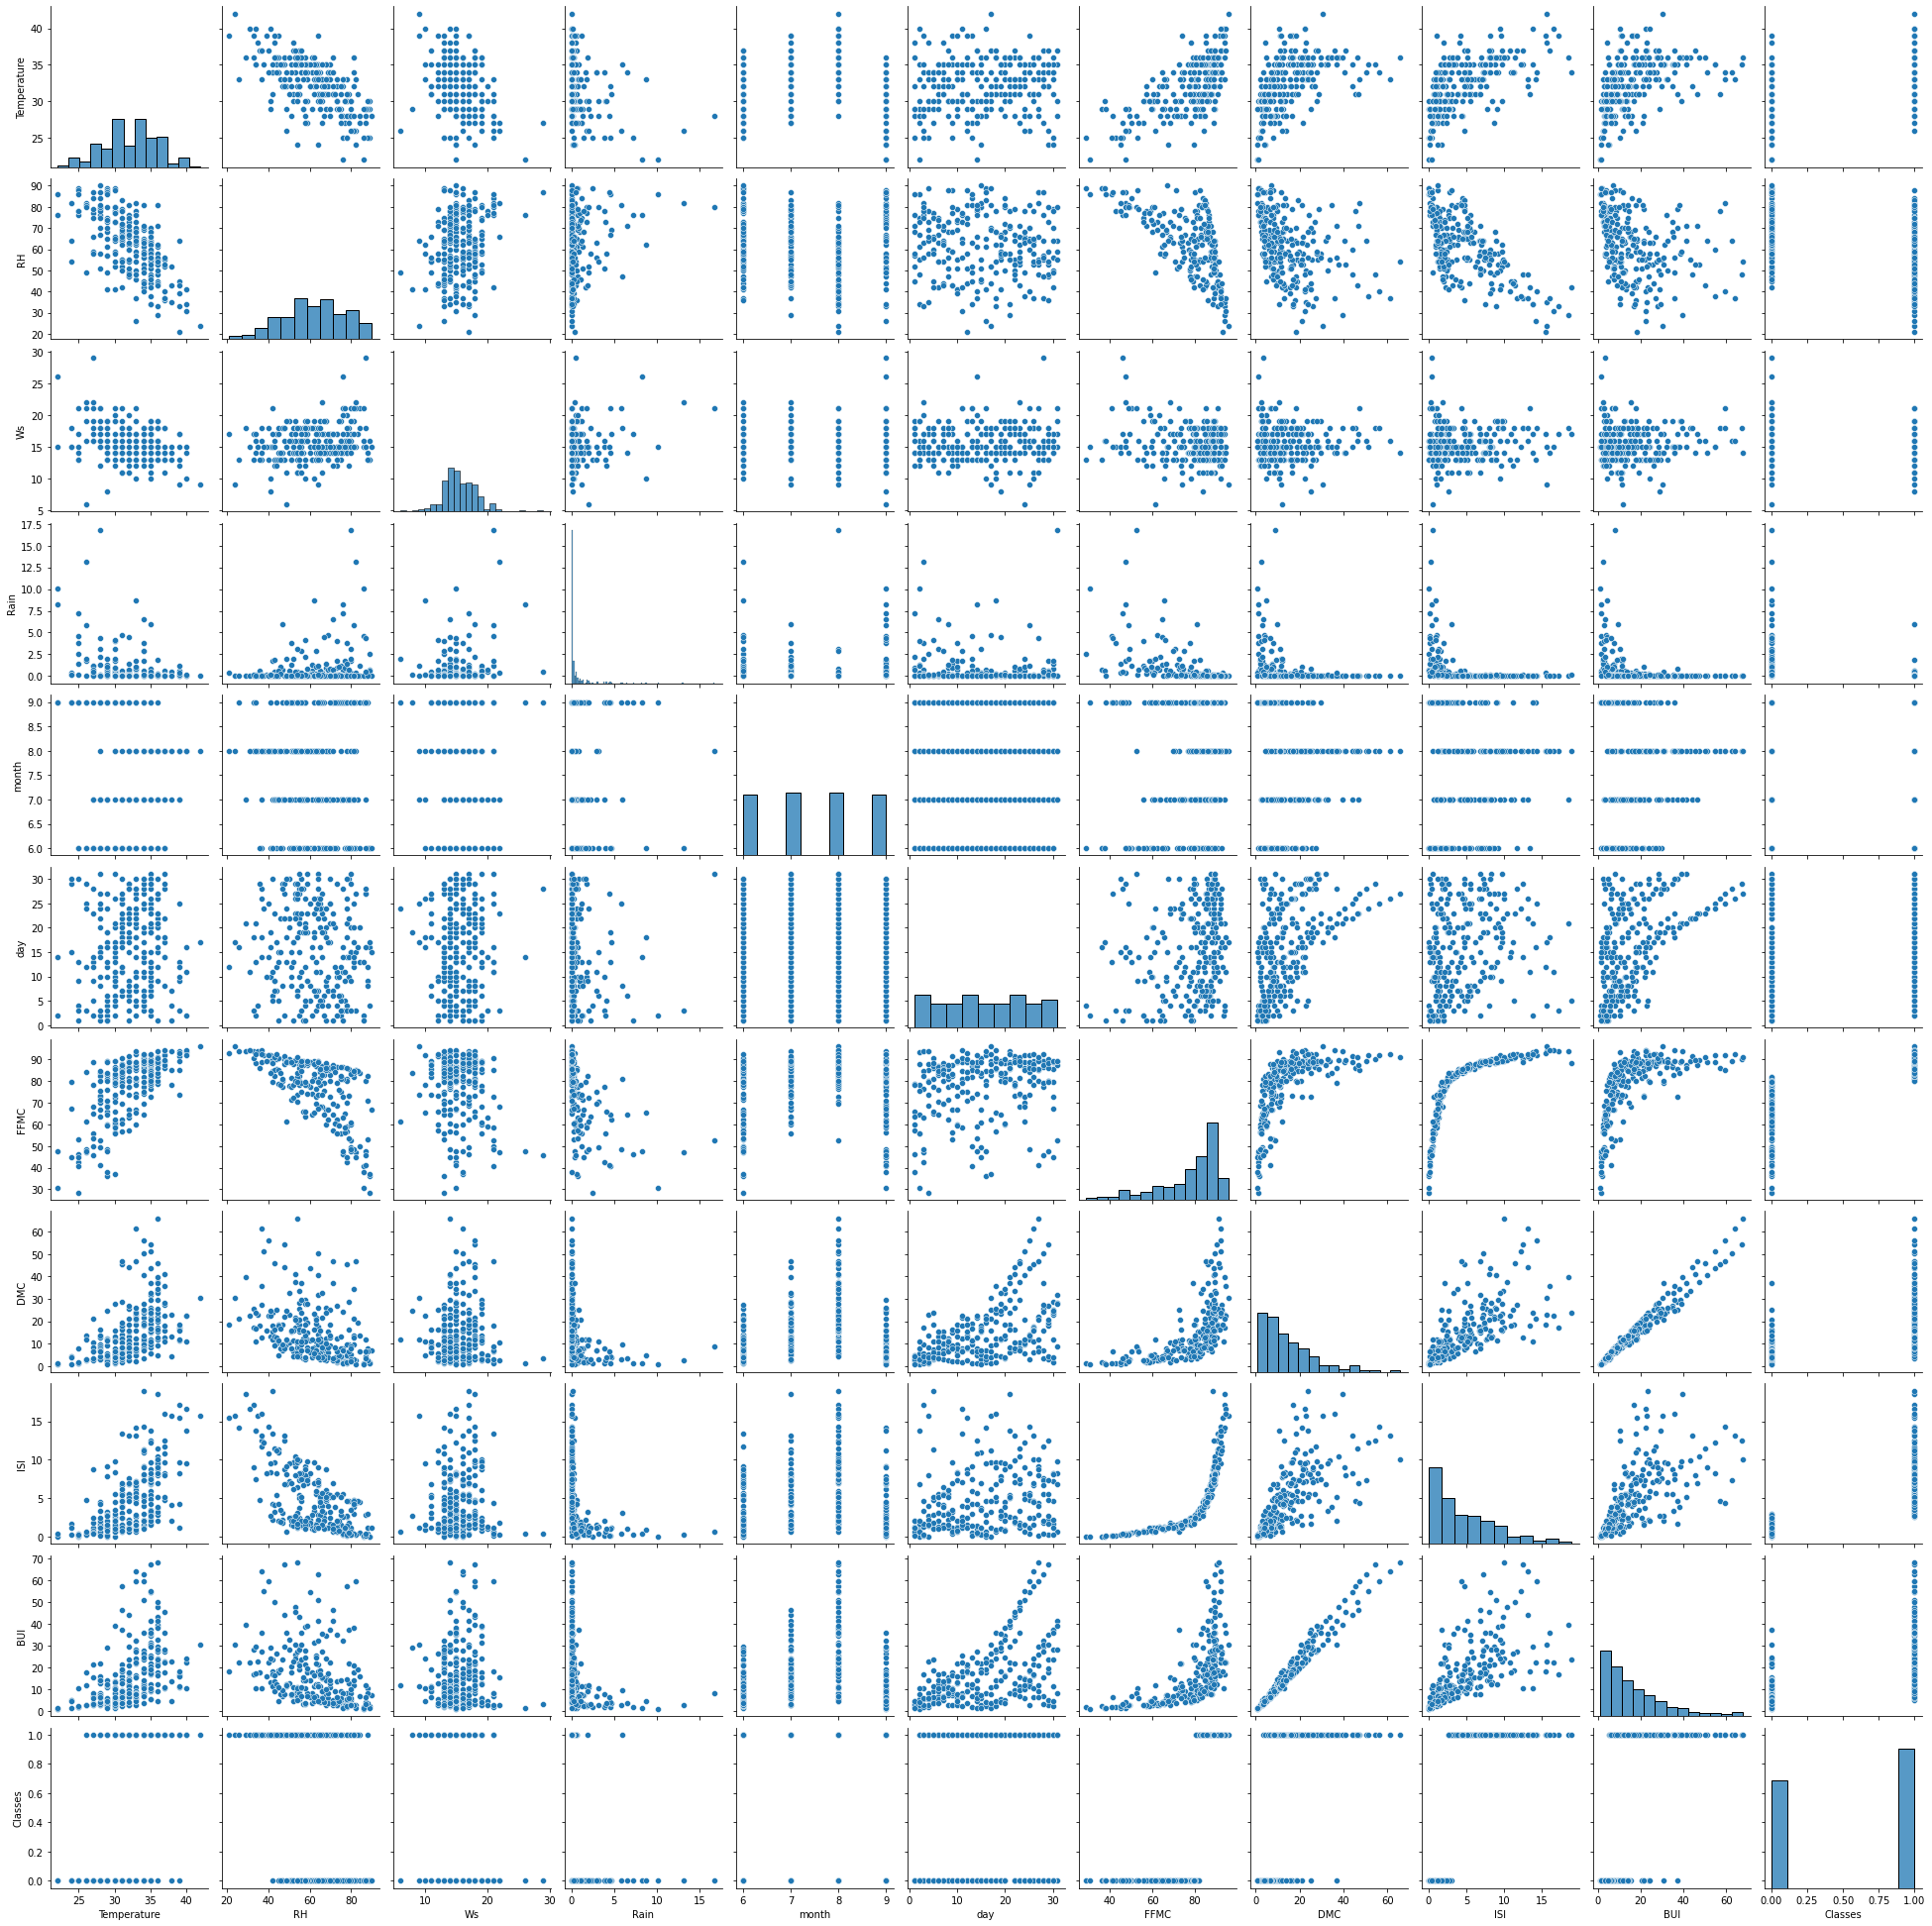

In [90]:
import seaborn as sns
sns.pairplot(dataset)

# check Correlation

<AxesSubplot:>

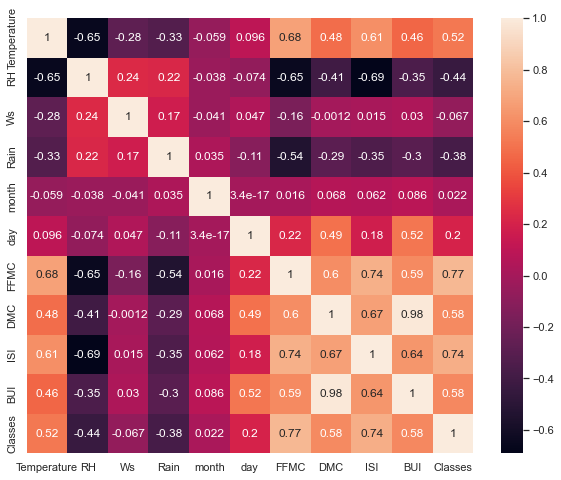

In [91]:
sns.set(rc={'figure.figsize':(10,8)})

sns.heatmap(dataset.corr(),annot=True)

In [38]:
dataset.head(2)

,Temperature,RH,Ws,Rain,month,day,FFMC,DMC,ISI,BUI,Classes
0,29,57,18.0000,0.0000,6,1,65.7000,3.4000,1.3000,3.4000,0.0000
1,29,61,13.0000,1.3000,6,2,64.4000,4.1000,1.0000,3.9000,0.0000


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int32  
 1   RH           244 non-null    int32  
 2   Ws           244 non-null    float64
 3   Rain         244 non-null    float64
 4   month        244 non-null    int32  
 5   day          244 non-null    int32  
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   ISI          244 non-null    float64
 9   BUI          244 non-null    float64
 10  Classes      244 non-null    float64
dtypes: float64(7), int32(4)
memory usage: 19.1 KB


In [40]:
corr_matrix['Classes']

Temperature    0.5181
RH            -0.4350
Ws            -0.0665
Rain          -0.3794
month          0.0223
day            0.2018
FFMC           0.7701
DMC            0.5842
ISI            0.7355
BUI            0.5839
Classes        1.0000
Name: Classes, dtype: float64

# Independent And Dependent Features

In [41]:
x=dataset.loc[:,'Temperature':'BUI'] 
y=dataset.iloc[:,-1:]

In [42]:
dataset.iloc[:,-1:]

,Classes
0,0.0000
1,0.0000
2,0.0000
3,0.0000
4,0.0000
...,...
241,1.0000
242,0.0000
243,0.0000
244,0.0000


# Independent Features

In [43]:
x.head()

,Temperature,RH,Ws,Rain,month,day,FFMC,DMC,ISI,BUI
0,29,57,18.0000,0.0000,6,1,65.7000,3.4000,1.3000,3.4000
1,29,61,13.0000,1.3000,6,2,64.4000,4.1000,1.0000,3.9000
2,26,82,22.0000,13.1000,6,3,47.1000,2.5000,0.3000,2.7000
3,25,89,13.0000,2.5000,6,4,28.6000,1.3000,0.0000,1.7000
4,27,77,16.0000,0.0000,6,5,64.8000,3.0000,1.2000,3.9000


In [44]:
y.head()

,Classes
0,0.0000
1,0.0000
2,0.0000
3,0.0000
4,0.0000


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=10)

In [47]:
x_train.shape

(163, 10)

In [48]:
y_train.shape

(163, 1)

In [49]:
x_test.shape

(81, 10)

In [50]:
y_test.shape

(81, 1)

# Standardize or feature scaling the datasets

In [51]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [52]:
x_train=scaler.fit_transform(x_train)

In [53]:
x_test=scaler.transform(x_test)

In [54]:
x_train

array([[-1.77085211, -0.85631108, -3.36419461, ..., -0.21897266,
        -0.9695694 , -0.32535487],
       [ 1.09557186, -0.52508491,  0.99944243, ...,  0.42852925,
         1.17918645,  0.76565444],
       [-0.33764012,  0.13736742,  0.99944243, ...,  0.25266453,
         0.4708054 ,  0.35302912],
       ...,
       [-0.05099773, -0.72382061, -0.81873967, ...,  0.10877522,
         0.5180308 ,  0.08727045],
       [-0.62428252,  0.13736742, -0.45510325, ..., -0.75456066,
        -0.59176617, -0.76595478],
       [-1.19756732,  1.13104591, -1.18237609, ..., -0.41082508,
        -0.80428049, -0.27639932]])

In [55]:
x_test

array([[ 5.22287067e-01, -3.92594448e-01, -9.14668296e-02,
         1.48701853e+00, -4.48858777e-01, -4.92481607e-01,
        -1.82411230e-01, -6.02677495e-01, -7.33442383e-01,
        -6.82030988e-01],
       [ 8.08929464e-01,  1.37367416e-01,  6.35806011e-01,
        -4.41414004e-01, -4.48858777e-01,  1.90020102e+00,
         6.64566895e-01,  1.37979749e+00,  4.94418103e-01,
         1.72378441e+00],
       [ 1.09557186e+00, -1.12129201e+00, -4.55103250e-01,
        -4.41414004e-01,  4.43384889e-01, -1.68882292e+00,
         9.08075201e-02, -7.86536062e-01, -6.38991577e-01,
        -8.28897625e-01],
       [ 8.08929464e-01,  7.11221826e-02, -4.55103250e-01,
        -2.41920984e-01,  4.43384889e-01, -1.44955466e+00,
        -5.94627923e-02, -7.14591405e-01, -7.09829682e-01,
        -7.72948430e-01],
       [ 8.08929464e-01, -1.93858749e-01,  6.35806011e-01,
        -4.41414004e-01,  4.43384889e-01, -7.31749870e-01,
         6.78227832e-01,  1.28490116e-02,  5.18030804e-01,
         9.

# Model Training

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
regression=LinearRegression()

In [58]:
regression

LinearRegression()

In [59]:
regression.fit(x_train,y_train)

LinearRegression()

# print the coefficients and the intercept

In [60]:

print(regression.coef_)

[[ 0.01438648  0.17683894 -0.01828915  0.0506619  -0.00287895 -0.00802009
   0.29741955 -0.1205832   0.3042736   0.11124155]]


In [61]:
print(regression.intercept_)

[0.53374233]


# Prediction for the test data

In [62]:

reg_pred=regression.predict(x_test)

In [63]:
reg_pred

array([[ 0.27346303],
       [ 0.89520272],
       [ 0.18465913],
       [ 0.33088942],
       [ 0.84997722],
       [ 1.08166625],
       [ 1.04057145],
       [ 0.37124886],
       [ 0.60880596],
       [ 0.80391825],
       [ 0.89104912],
       [ 0.06971065],
       [ 0.60469692],
       [ 0.33537622],
       [ 0.48338002],
       [ 0.81376324],
       [ 0.48929094],
       [-0.26326196],
       [ 1.32142337],
       [ 0.92674538],
       [ 0.66550256],
       [ 1.07901986],
       [ 0.95044806],
       [ 0.87197646],
       [ 1.40570772],
       [ 0.35816413],
       [ 0.46097525],
       [ 0.14008946],
       [-0.18360509],
       [ 0.88445294],
       [-0.03595053],
       [-0.3352528 ],
       [ 0.78991669],
       [ 0.32143464],
       [ 0.80360105],
       [ 0.31640908],
       [ 0.10860114],
       [ 0.57254424],
       [-0.24664634],
       [ 0.94351618],
       [ 1.11005355],
       [ 0.89609277],
       [ 1.11096765],
       [ 0.66176453],
       [ 0.95701699],
       [ 0

# Assumptions Of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

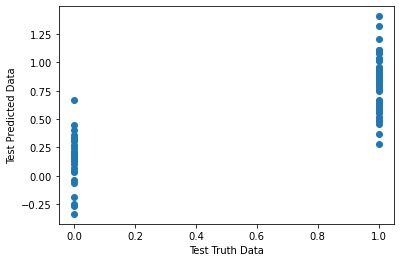

In [64]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

# residuals

In [65]:
residuals=y_test-reg_pred

In [66]:
residuals

,Classes
164,-0.2735
60,0.1048
61,-0.1847
63,-0.3309
69,0.1500
...,...
171,0.2352
234,0.7192
146,-0.2061
210,-0.0277


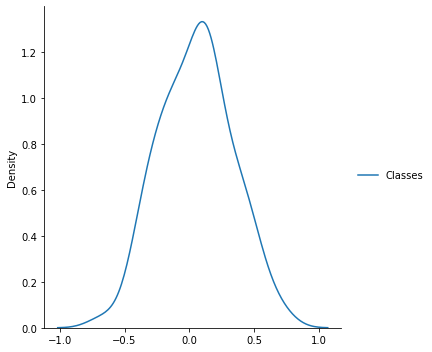

In [67]:
sns.displot(residuals,kind="kde")

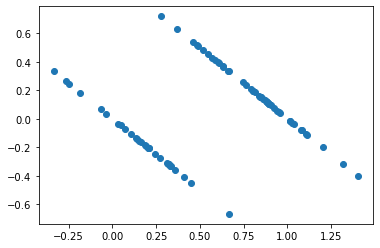

In [68]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [69]:
##mean_squared_error
##mean_absolute_error
##root mean square error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(f"mean_squared_error = {mean_squared_error(y_test,reg_pred)}")
print(f"mean_absolute_error = {mean_absolute_error(y_test,reg_pred)}")
print(f"root_mean_square_error = {np.sqrt(mean_squared_error(y_test,reg_pred))}")

mean_squared_error = 0.07895339354681759
mean_absolute_error = 0.23040805172158244
root_mean_square_error = 0.2809864650598274


# R square and adjusted R square

In [70]:
#R-squared
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6614292712021763


In [71]:
## Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6130620242310587

# Ridge

In [72]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [73]:
ridge.fit(x_train,y_train)

Ridge()

In [74]:
ridge.predict(x_test)

array([[ 0.27637638],
       [ 0.88544615],
       [ 0.19688482],
       [ 0.33723168],
       [ 0.84534282],
       [ 1.07201569],
       [ 1.02458513],
       [ 0.3682462 ],
       [ 0.60245751],
       [ 0.79622676],
       [ 0.89428304],
       [ 0.07611646],
       [ 0.61354466],
       [ 0.32705962],
       [ 0.48112565],
       [ 0.8088824 ],
       [ 0.48787398],
       [-0.25681732],
       [ 1.31739401],
       [ 0.93608439],
       [ 0.65675449],
       [ 1.05852633],
       [ 0.94181879],
       [ 0.86934986],
       [ 1.39733583],
       [ 0.35544913],
       [ 0.45879263],
       [ 0.15217426],
       [-0.17666799],
       [ 0.86964225],
       [-0.03621177],
       [-0.32226934],
       [ 0.78200109],
       [ 0.32353504],
       [ 0.79066501],
       [ 0.32074498],
       [ 0.10675778],
       [ 0.57267021],
       [-0.23875283],
       [ 0.92973115],
       [ 1.09459381],
       [ 0.90198426],
       [ 1.10627205],
       [ 0.65525105],
       [ 0.95627522],
       [ 0

# Lasso

In [75]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [76]:
lasso.fit(x_train,y_train)

Lasso()

In [77]:
lasso.predict(x_test)

array([0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374233,
       0.53374233, 0.53374233, 0.53374233, 0.53374233, 0.53374

# LogisticRegression

In [78]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression

In [79]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_pred = log_reg.predict(x_test)

In [81]:
y_pred

array([0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.])

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Confusion Matrix

In [83]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[30,  0],
       [ 6, 45]], dtype=int64)

In [84]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

# Accuracy

In [85]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9259259259259259

Accuracy is 92%. it means 92% of predictions value are correct

# Precision

In [86]:
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

Out of all actual value 100% of value are currectily predicted becouse False Positive(FP) is zero

# Recall

In [87]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8333333333333334

Out of all predicted value 83.333% values are correctily predicted

# F1_score

if FP and FN are both important then BETA =1

In [88]:
F1_score = 2 * (Precision * Recall) / (Precision + Recall)

In [89]:
F1_score

0.9090909090909091

# F0.5_score

if FP more important then FN (BETA =0.5)

In [98]:
F_score = 1.25 * (Precision * Recall) / (0.25*Precision + Recall)

In [99]:
F_score

0.9615384615384615

# F2_score

if FN>>FP then BETA =2

In [93]:
F2_score = 5 * (Precision * Recall) / (4*Precision + Recall)

In [94]:
F2_score 

0.8620689655172415